# **Import Libraries & Setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px

# **Data Loading & Preview**

In [2]:
train = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
stores = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
features = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')
test = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
submission = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# **Data Preprocessing**

In [6]:
df = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='inner').merge(stores, on = ['Store'], how='inner').sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [7]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [8]:
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [11]:
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  Day  Week  Month  Year  
0         8.106    A  151315    5    

In [12]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Day,Week,Month,Year
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,15.673131,25.826762,6.449510,2010.968591
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.0,1.000000,2010.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,8.000000,14.0,4.000000,2010.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,16.000000,26.0,6.000000,2011.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,23.000000,38.0,9.000000,2012.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,31.000000,52.0,12.000000,2012.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,8.753549,14.151887,3.243217,0.796876


# **Explorotary Data Analysis (EDA)**

In [13]:
weekly_sales_2010 = df[df['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean().reset_index()
weekly_sales_2011 = df[df['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean().reset_index()
weekly_sales_2012 = df[df['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean().reset_index()

weekly_sales_2010['Year'] = '2010'
weekly_sales_2011['Year'] = '2011'
weekly_sales_2012['Year'] = '2012'

stacked_data = pd.concat([weekly_sales_2010, weekly_sales_2011, weekly_sales_2012])

fig = px.area(
    stacked_data,
    x='Week',
    y='Weekly_Sales',
    color='Year',
    title='<b>Average Sales per Years</b>',
    template='plotly_white',
)

fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Sales',
    legend_title='Year',
    hovermode='x unified',
    width=850,
    height=500
)

fig.show()

In [14]:
sales_mean = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

fig = px.line(
    sales_mean,
    x='Date',
    y='Weekly_Sales',
    title='<b>Average Sales Period 2010 - 2012</b>',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    width=900,
    height=500
)

fig.show()

In [15]:
sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

fig = px.line(
    sales,
    x='Date',
    y='Weekly_Sales',
    title='<b>Total Sales Period 2010 - 2012</b>',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    width=900,
    height=500
)

fig.show()

In [16]:
# sales_mean = df.groupby('Date')['Weekly_Sales'].mean().reset_index(name='Mean')
# sales_median = df.groupby('Date')['Weekly_Sales'].median().reset_index(name='Median')

# sales_data = pd.merge(sales_mean, sales_median, on='Date')

# sales_long = sales_data.melt(id_vars='Date', value_vars=['Mean', 'Median'], 
#                              var_name='Category', value_name='Sales')

# fig = px.area(
#     sales_long,
#     x='Date',
#     y='Sales',
#     color='Category',
#     title='<b>Weekly Sales - Mean and Median</b>',
#     template='plotly_white'
# )

# fig.update_layout(
#     xaxis_title='Date',
#     yaxis_title='Sales',
#     hovermode='x unified',
#     legend_title='Category',
#     width=850,
#     height=500
# )

# fig.show()

In [17]:
sales = df.groupby('Week')['Weekly_Sales'].sum().reset_index(name='Sales')
md1 = df.groupby('Week')['MarkDown1'].sum().reset_index(name='MD1')
md2 = df.groupby('Week')['MarkDown2'].sum().reset_index(name='MD2')
md3 = df.groupby('Week')['MarkDown3'].sum().reset_index(name='MD3')
md4 = df.groupby('Week')['MarkDown4'].sum().reset_index(name='MD4')
md5 = df.groupby('Week')['MarkDown5'].sum().reset_index(name='MD5')

stacked_data = sales.merge(md1, on='Week') \
                    .merge(md2, on='Week') \
                    .merge(md3, on='Week') \
                    .merge(md4, on='Week') \
                    .merge(md5, on='Week')

stacked_long = stacked_data.melt(id_vars='Week', 
                                 value_vars=['Sales', 'MD1', 'MD2', 'MD3', 'MD4', 'MD5'],
                                 var_name='Category', 
                                 value_name='Value')

fig = px.area(
    stacked_long,
    x='Week',
    y='Value',
    color='Category',
    title='<b>Sales vs MarkDown</b>',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Sales',
    legend_title='Category',
    hovermode='x unified',
    width=850,
    height=500
)

fig.show()

In [18]:
sales_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

fig = px.bar(
    sales_store,
    x='Store',
    y='Weekly_Sales',
    color='Weekly_Sales',  
    color_continuous_scale=px.colors.sequential.YlGnBu,
    title='<b>Average Weekly Sales Per Store</b>',
    template='plotly_white',
)

fig.update_layout(
    xaxis_title='Store',
    yaxis_title='Weekly Sales',
    width=850,
    height=500,
    xaxis=dict(tickangle=-90, showline=True, linewidth=1, linecolor='gray'),
    yaxis=dict(showline=True, linewidth=1, linecolor='gray'),
    margin=dict(l=70, r=70, t=80, b=100),
)

fig.show()

In [19]:
sales_dept = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()

fig = px.bar(
    sales_dept,
    x='Dept',
    y='Weekly_Sales',
    color='Weekly_Sales',  
    color_continuous_scale=px.colors.sequential.YlGnBu,
    title='<b>Average Weekly Sales Per Department</b>',
    template='plotly_white',
)

fig.update_layout(
    xaxis_title='Department',
    yaxis_title='Weekly Sales',
    width=850,
    height=500,
    xaxis=dict(tickangle=-90, showline=True, linewidth=1, linecolor='gray'),
    yaxis=dict(showline=True, linewidth=1, linecolor='gray'),
    margin=dict(l=70, r=70, t=80, b=100),
)

fig.show()

In [20]:
sales_store_size = df.groupby('Size')['Weekly_Sales'].mean().reset_index()

fig = px.line(
    sales_store_size,
    x='Size',
    y='Weekly_Sales',
    title='<b>Average Sales Based on Store Sizes</b>',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Store Size',
    yaxis_title='Sales',
    hovermode='x unified',
    width=900,
    height=500
)

fig.show()

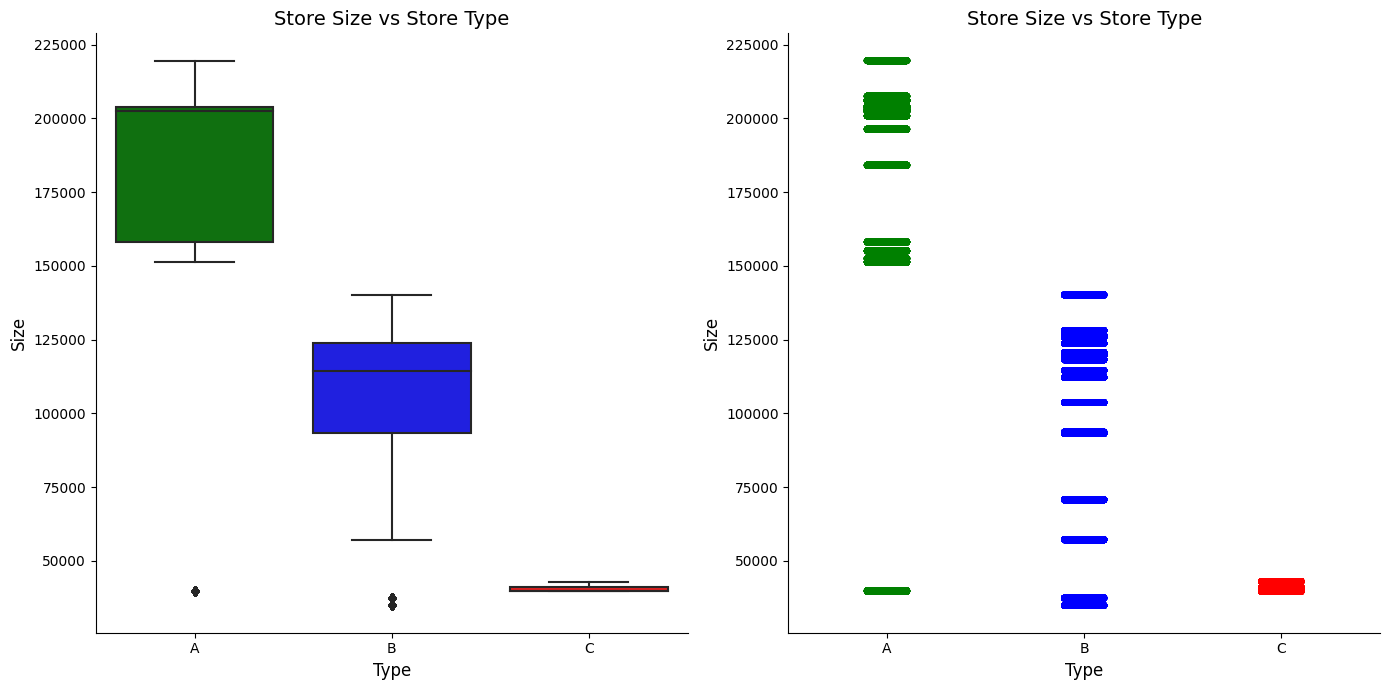

In [21]:
colors = {'A': 'green', 'B': 'blue', 'C': 'red'}

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=df, 
    x='Type', 
    y='Size',
    palette=colors
)
plt.title('Store Size vs Store Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Size', fontsize=12)

plt.subplot(1, 2, 2)
sns.stripplot(
    data=df,
    x='Type',
    y='Size',
    palette=colors
)
plt.title('Store Size vs Store Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Size', fontsize=12)

plt.tight_layout()
sns.despine()  
plt.show()

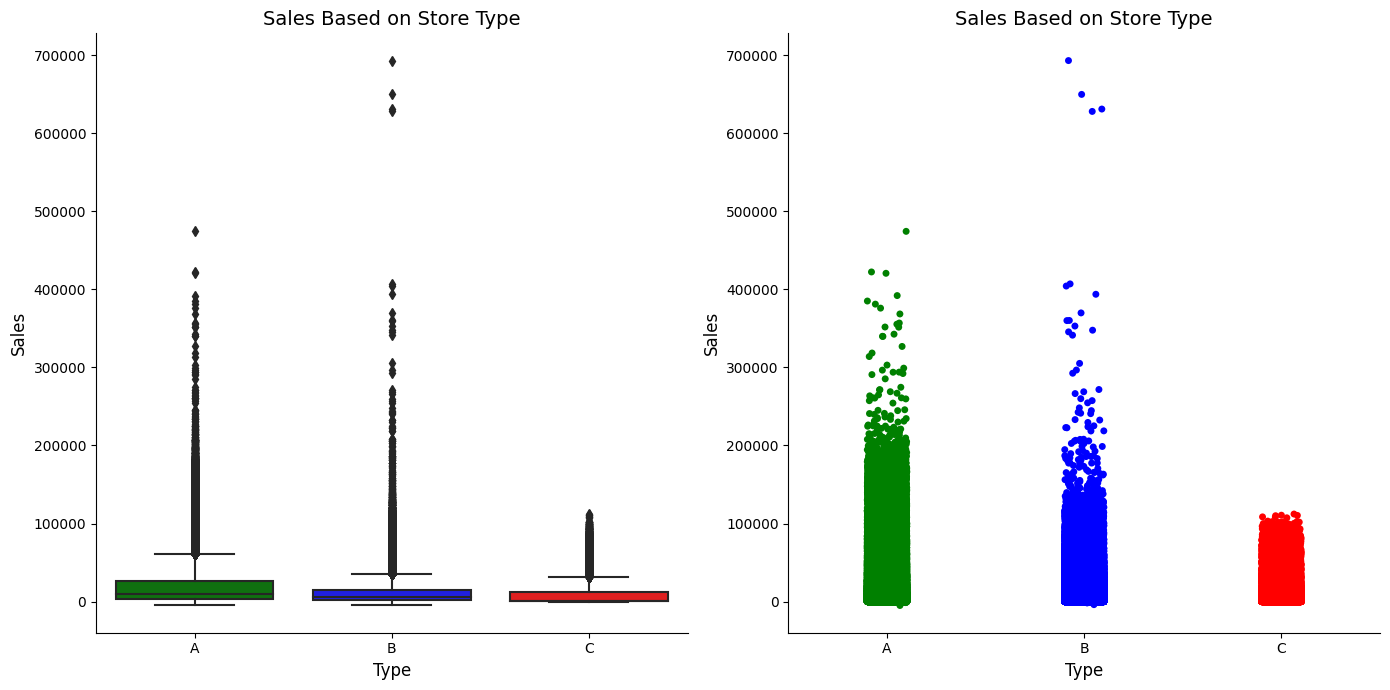

In [22]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=df, 
    x='Type', 
    y='Weekly_Sales',
    palette=colors
)
plt.title('Sales Based on Store Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.subplot(1, 2, 2)
sns.stripplot(
    data=df,
    x='Type',
    y='Weekly_Sales',
    palette=colors
)
plt.title('Sales Based on Store Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.tight_layout()
sns.despine()  
plt.show()